## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

/home/macteos/Documents/Code/Kaggle Projects/Housing Prices/.venv/lib/python3.12/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
df_train = pd.read_csv('../data/raw/train.csv')
df_test = pd.read_csv('../data/raw/test.csv')

df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

## Preprocessing

In [3]:
def preprocess_data(df_train, df_test):
    label_enc = LabelEncoder()
    label_cols = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']
    for col in label_cols:
        df_train[col] = label_enc.fit_transform(df_train[col])
        df_test[col] = label_enc.transform(df_test[col])
    df_train = pd.get_dummies(df_train, columns=['loan_intent'], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['loan_intent'], drop_first=True)
    target_col = 'loan_status'
    train_columns = df_train.drop(columns=[target_col]).columns
    df_test = df_test.reindex(columns=train_columns, fill_value=0)
    return df_train, df_test

df_train_processed, df_test_processed = preprocess_data(df_train, df_test)

In [4]:
df_train = df_train_processed
df_test = df_test_processed

df_train.shape, df_test.shape

((58645, 16), (39098, 15))

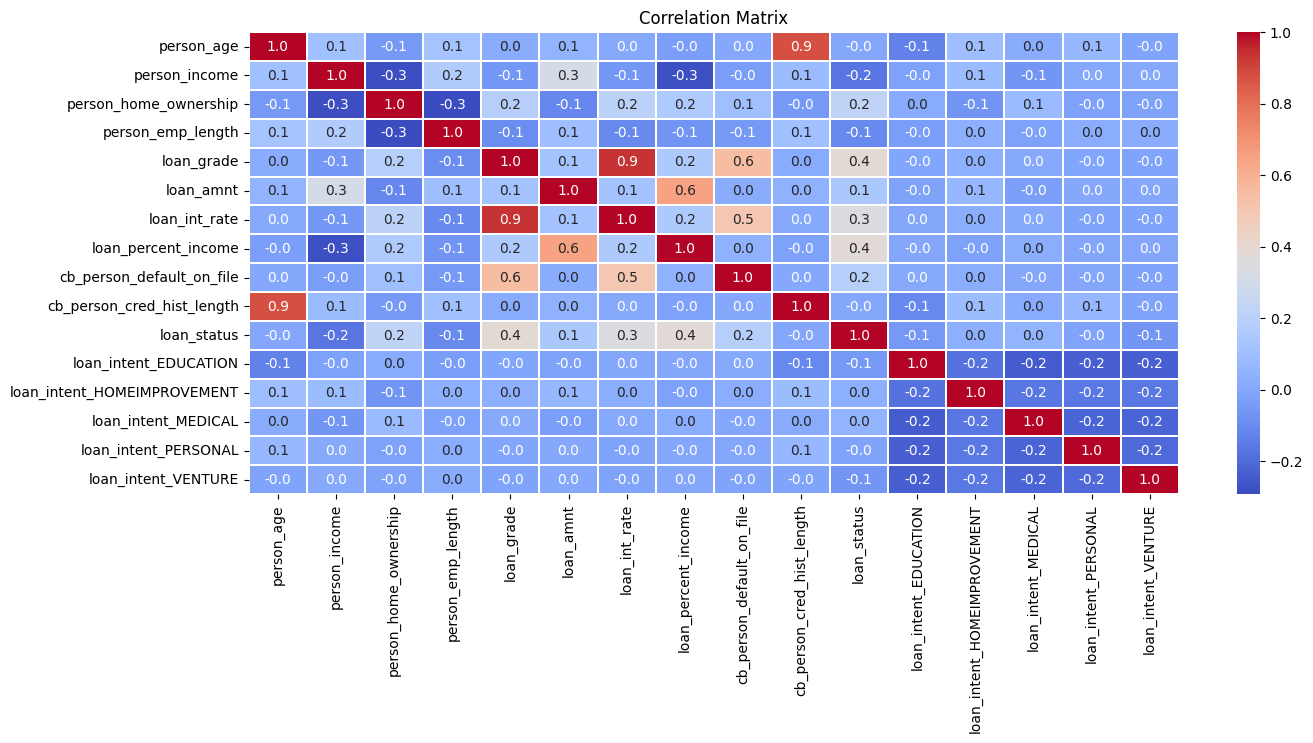

In [5]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

In [6]:
y = df_train['loan_status']
df_train = df_train.drop(['loan_status'],axis=1)
X = df_train

In [7]:
scaler = StandardScaler()
scaled_train_data = df_train
scaled_test_data = df_test

In [9]:
scaled_test_data.to_csv('../data/processed/processed_test.csv', index=False)
scaled_train_data.to_csv('../data/processed/processed_train.csv', index=False)